In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import pandas as pd

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

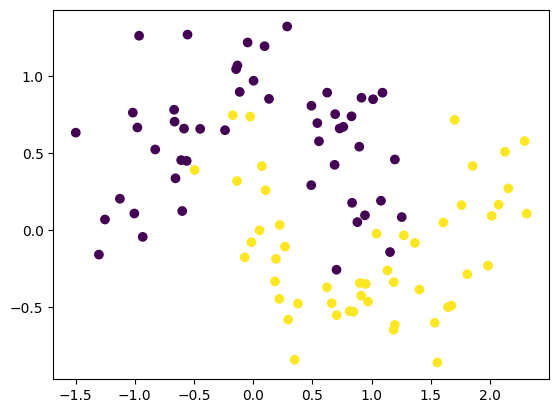

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[ 0.8480642 ,  0.5780655 , -0.22987245, -0.11764152,  0.5427287 ,
          0.7331762 ,  0.5016309 ,  0.02769374, -0.5822082 , -0.27997202],
        [ 0.6249107 , -0.52783245,  0.04758412, -0.42134124,  0.23855692,
          0.14721124,  0.83020794,  0.426952  ,  0.19903661,  0.25008988]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 8.7304674e-02, -3.8092861e-01,  3.7931022e-01, -5.6637949e-01,
          1.2769058e-01, -5.5986673e-01,  1.0394425e-02,  5.3768624e-02,
          3.1849945e-01, -3.2770607e-01],
        [ 2.3831165e-01,  4.0295866e-01,  3.9971694e-02, -2.5017923e-01,
          4.3606102e-01,  1.0745578e-04, -4.7392955e-01,  2.4001996e-01,
         -1.7396636e-01, -3.2235688e-01],
        [-6.7613058e-02, -3.3200362e-01, -5.1973516e-01,  2.8894526e-01,
         -1.6635340e-01, -9.6102238e-02,  4.6726856e-02, -7.0976615e-02,
          6.1549771e-01,  1.6818056e-01],
        [-3.6903402e-01, -5.3338766e-01,  1.57594

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[-0.2318107 ,  0.36521712,  0.15327524, -0.39179316, -0.60515845,
         -0.7514386 ,  0.40150458, -1.8196534 ,  0.5159886 ,  0.36082867],
        [ 0.09722109,  0.5704777 , -1.0699991 ,  1.0031825 , -0.8432482 ,
          0.43632966, -0.57114345,  0.22268501, -0.6433037 ,  1.4251382 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.02454797,  0.11577022, -0.37272084,  0.16679454,  0.16090715,
         -0.13580883, -0.18879023, -0.30986497,  0.08573417,  0.17232811],
        [ 0.2655693 ,  0.30408454,  0.22119473, -0.00219108, -0.43414646,
          0.06975086,  0.5614005 ,  0.19302145, -0.3680653 ,  0.42246944],
        [ 0.29063424, -0.24442878,  0.32102722, -0.0878896 ,  0.03792441,
          0.30026588,  0.07677679, -0.07591607,  0.586802  , -0.29224858],
        [-0.37990505, -0.41404963, -0.5443173 , -0.27988157, -0.39099348,
          0.07230602, -0.3666919 ,  0.19330058, -0.345226  , -0.10261356],
        [-0.14386

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.6656 - loss: 0.6755 - val_accuracy: 0.7500 - val_loss: 0.6492
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6641 - loss: 0.6604 - val_accuracy: 0.8000 - val_loss: 0.6303
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6687 - loss: 0.6493 - val_accuracy: 0.8000 - val_loss: 0.6122
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7508 - loss: 0.6245 - val_accuracy: 0.8000 - val_loss: 0.5937
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6922 - loss: 0.6260 - val_accuracy: 0.8000 - val_loss: 0.5759
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6844 - loss: 0.6082 - val_accuracy: 0.8000 - val_loss: 0.5591
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7273 - loss: 0.5881 - val_accuracy: 0.8500 - val_loss: 0.5424
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7016 - loss: 0.5810 - val_accuracy: 0.8500 - val_loss

In [16]:
model.get_weights()

[array([[-0.18840688,  0.3006993 ,  0.24907011, -0.3709497 , -0.60418874,
         -0.7807244 ,  0.3655281 , -1.6994478 ,  0.42617574,  0.30952734],
        [ 0.19595546,  0.6804553 , -1.1219178 ,  1.087825  , -0.7869204 ,
          0.42058706, -0.6585293 ,  0.29103625, -0.75593114,  1.4913425 ]],
       dtype=float32),
 array([-0.02420896, -0.08131909,  0.05471257,  0.00064137, -0.1112942 ,
         0.0361286 , -0.00559291, -0.10635399, -0.02924076, -0.068797  ],
       dtype=float32),
 array([[-0.02601182,  0.16986738, -0.40807196,  0.07636354,  0.25150007,
         -0.29051256, -0.07678568, -0.35271427, -0.05560782,  0.26376766],
        [ 0.14643155,  0.33536354,  0.08739642, -0.04004315, -0.33141986,
          0.13575973,  0.6062256 ,  0.12390131, -0.25830895,  0.51887   ],
        [ 0.36706674, -0.263838  ,  0.41533098, -0.0155163 , -0.05581671,
          0.37370068, -0.01559752, -0.01779293,  0.658219  , -0.38157204],
        [-0.4498535 , -0.38992962, -0.63130325, -0.35792994, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

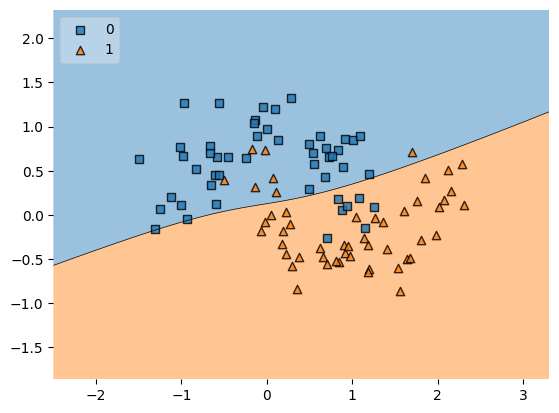

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)